# 打靶法求解边值问题
$$u'' = -\tfrac{\pi^2}{4}(u + 1), \quad u(0) = 0, \quad u(1) = 1 $$
$$u(t)=cos(2πt)+2sin(2πt)−1$$

最优初始斜率 u'(0) = 3.1414518132805824


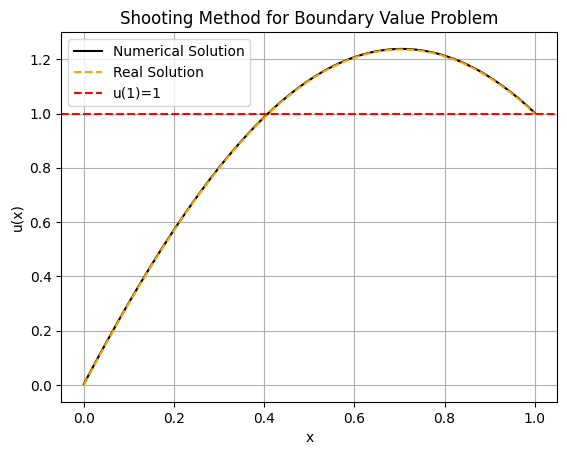

In [12]:
import math

def f(u):
    return [u[1], -(math.pi**2/4)*(u[0]+1)]

def solve(s, h=0.0001):
    t = 0
    u = [0, s]  
    while t <= 1:
        du = f(u)
        u[0] += h * du[0]
        u[1] += h * du[1]
        t += h
    return u[0]  


def shooting():
    a, b = 0, 5 
    for _ in range(50):
        c = (a + b)/2
        uc = solve(c)
        if abs(uc - 1) < 1e-8:
            return c
        if (uc - 1)*(solve(a)-1) < 0:
            b = c
        else:
            a = c
    return (a + b)/2


s = shooting()
print("最优初始斜率 u'(0) =", s)

import matplotlib.pyplot as plt
import numpy as np

def real_solution(x):
    return math.cos(math.pi*x/2) + 2*math.sin(math.pi*x/2) - 1
u_x = np.linspace(0, 1, 1000)
u_y=[]
for x in u_x:
    u = [0, s]  
    t = 0
    while t <= x:
        du = f(u)
        u[0] += 0.001 * du[0]
        u[1] += 0.001 * du[1]
        t += 0.001
    u_y.append(u[0])
real_u=[]
for x in u_x:
    real_u.append(real_solution(x))
plt.plot(u_x, u_y, label='Numerical Solution', color='black')
plt.plot(u_x, real_u, label='Real Solution', linestyle='--', color='orange')
plt.axhline(1, color='r', linestyle='--', label='u(1)=1')
plt.title('Shooting Method for Boundary Value Problem')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid()
plt.show()



有趣的事实：缩小步长，初始斜率应当趋近于$\pi$